In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.generate_phrases import generate_random_phrase, generate_random_phrase_with_mutation, alphabet

In [3]:
def generate_phrases(phrase, u=0.1, gen_max=1e12):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen = 0
    initial_phrase = generate_random_phrase(phrase_size, alphabet)
    new_phrase = initial_phrase
    reached = False
    while True:
        if new_phrase == phrase:
            reached = True

        if new_phrase == phrase or gen >= gen_max:
            break
        new_phrase = generate_random_phrase_with_mutation(initial_phrase, alphabet=alphabet, u=u)
        gen += 1
    return initial_phrase, {"gen": gen, "reached": reached}


In [7]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
u = 0.01
size_exp = 30

gens_list = []
for i in range(size_exp):
    initial_phrase, gen = generate_phrases(phrase, u)
    gens_list.append(gen)

    print(f"Took {gen.get('gen'):,} generations to generate the phrase '{phrase}' from '{initial_phrase}'")

Took 8,006 generations to generate the phrase 'GAGCCC' from 'AGGCAT'
Took 9,101 generations to generate the phrase 'GAGCCC' from 'CCATCT'
Took 2,276 generations to generate the phrase 'GAGCCC' from 'GAACAT'
Took 8,730 generations to generate the phrase 'GAGCCC' from 'CGGGAT'
Took 1,820 generations to generate the phrase 'GAGCCC' from 'GCCATC'
Took 904 generations to generate the phrase 'GAGCCC' from 'GATATT'
Took 541 generations to generate the phrase 'GAGCCC' from 'TCATGA'
Took 3,339 generations to generate the phrase 'GAGCCC' from 'CACTGT'
Took 3,650 generations to generate the phrase 'GAGCCC' from 'CAGGGG'
Took 2,091 generations to generate the phrase 'GAGCCC' from 'AACCGA'
Took 6,549 generations to generate the phrase 'GAGCCC' from 'CAGTAT'
Took 1,674 generations to generate the phrase 'GAGCCC' from 'CCGATA'
Took 3,914 generations to generate the phrase 'GAGCCC' from 'ATTAGT'
Took 395 generations to generate the phrase 'GAGCCC' from 'GGGACT'
Took 1,441 generations to generate the p

        Generations
count     30.000000
mean    3481.400000
std     2902.405276
min      215.000000
25%     1095.750000
50%     3080.000000
75%     4486.250000
max    10691.000000


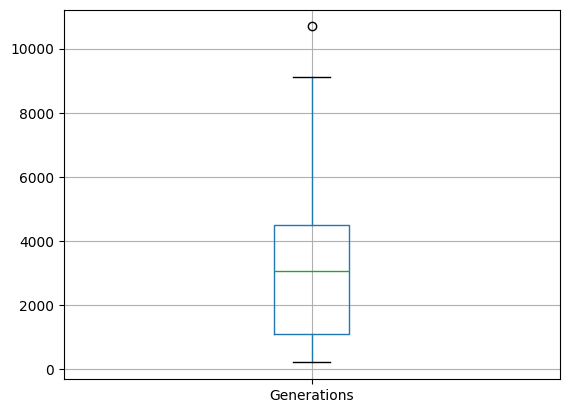

In [8]:
# Add Boxplot
d = {
    "Generations": [item.get("gen") for item in gens_list]
}

df = pd.DataFrame(d)

print(df.describe())

df.boxplot()
plt.show()

## Variar o valor de u: 0 a 1, incrementos de 0.001(?)

- Relação entre u e o número médio de gerações necessário para se encontrar o alvo (N médio)
- Há um valor ótimo para u?

## Gráficos

- u por MED(N)
- u port L por MED(N) (Se variar L)

Generating phrases for different mutation rates: 
 [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]
Mutation rate: 0.00 | Mean generations: 4,219.13 | Time taken: 0.36s
Mutation rate: 0.10 | Mean generations: 5,068.07 | Time taken: 0.40s
Mutation rate: 0.20 | Mean generations: 11,148.67 | Time taken: 0.83s
Mutation rate: 0.30 | Mean generations: 10,100.73 | Time taken: 0.69s
Mutation rate: 0.40 | Mean generations: 23,438.73 | Time taken: 1.49s
Mutation rate: 0.50 | Mean generations: 64,948.93 | Time taken: 3.65s
Mutation rate: 0.60 | Mean generations: 221,271.1 | Time taken: 10.98s
Mutation rate: 0.70 | Mean generations: 642,980.77 | Time taken: 28.51s
This experiment did not reach the phrase
This experiment did not reach the phrase
This experiment did not reach the phrase
This experiment did not reach the phrase
Mutation rate: 0.80 | Mean generations: 3,228,491.77 | Time taken: 124.48s
This experiment did not reach the phrase
This experi

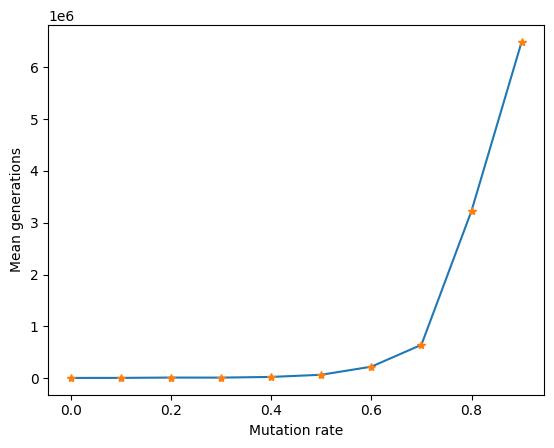

               U0.0          U0.1          U0.2  U0.30000000000000004  \
count     30.000000     30.000000     30.000000             30.000000   
mean    4219.133333   5068.066667  11148.666667          10100.733333   
std     3448.528849   4326.712226  11771.805570          16703.206739   
min       89.000000    150.000000    192.000000            333.000000   
25%     1279.750000   2014.500000   2161.500000           2848.250000   
50%     3793.500000   3843.000000   5671.000000           3962.000000   
75%     6042.500000   7224.500000  16505.500000          12121.250000   
max    12460.000000  19824.000000  46230.000000          89614.000000   

                U0.4           U0.5  U0.6000000000000001  U0.7000000000000001  \
count      30.000000      30.000000         3.000000e+01         3.000000e+01   
mean    23438.733333   64948.933333         2.212711e+05         6.429808e+05   
std     45458.519109   95234.275597         7.439741e+05         1.681640e+06   
min       510.0000

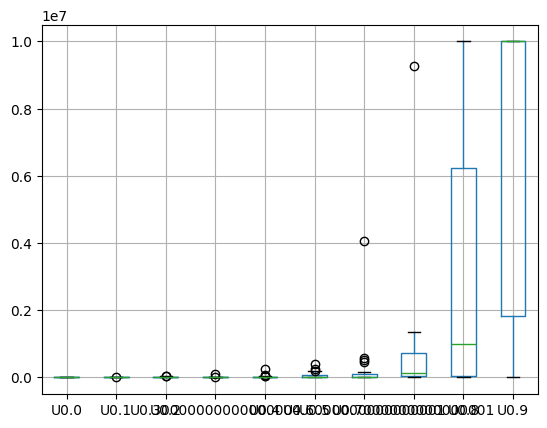

In [11]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.1
u_list = list(np.arange(0, 1, step))

print("Generating phrases for different mutation rates: \n", u_list)
med_gens = []
full_gens = []
t1 = time.time()
for u in u_list:
    gens = []
    t1_epoch = time.time()
    for i in range(qntd_exp):
        initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e7)
        gens.append(gen.get("gen"))
        if not gen.get("reached"):
            print(f"This experiment {i} did not reach the phrase")
    t2_epoch = time.time()
    print(f"Mutation rate: {u:.2f} | Mean generations: {round(np.mean(gens), 2):,} | Time taken: {t2_epoch-t1_epoch:.2f}s")

    med_gens.append(np.mean(gens))
    full_gens.append(gens)
t2 = time.time()
print("Mean generations: ", med_gens)
print("Time taken: ", t2-t1)

plt.plot(u_list, med_gens)
plt.plot(u_list, med_gens, '*')
plt.ylabel("Mean generations")
plt.xlabel("Mutation rate")
plt.show()

d = {}

for i in range(len(full_gens)):
    d[f"U{u_list[i]}"] = full_gens[i]

df = pd.DataFrame(d)

print(df.describe())

df.boxplot()
plt.show()

Generating phrases for different mutation rates: 
 [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39]
Mutation rate: 0.00 | Mean generations: 5514.60 | Time taken: 0.08s
Mutation rate: 0.01 | Mean generations: 5746.00 | Time taken: 0.07s
Mutation rate: 0.02 | Mean generations: 2576.60 | Time taken: 0.03s
Mutation rate: 0.03 | Mean generations: 5859.20 | Time taken: 0.07s
Mutation rate: 0.04 | Mean generations: 9376.00 | Time taken: 0.12s
Mutation rate: 0.05 | Mean generations: 1410.80 | Time taken: 0.02s
Mutation rate: 0.06 | Mean generations: 1992.60 | Time taken: 0.02s
Mutation rate: 0.07 | Mean generations: 4646.40 | Time taken: 0.06s
Mutation rate: 0.08 | Mean generations: 3297.80 | Time taken: 0.04s
Mutation rate: 0.09 | Mean generations: 3099.00 | Time taken: 0.04s
Mutation rate: 0.

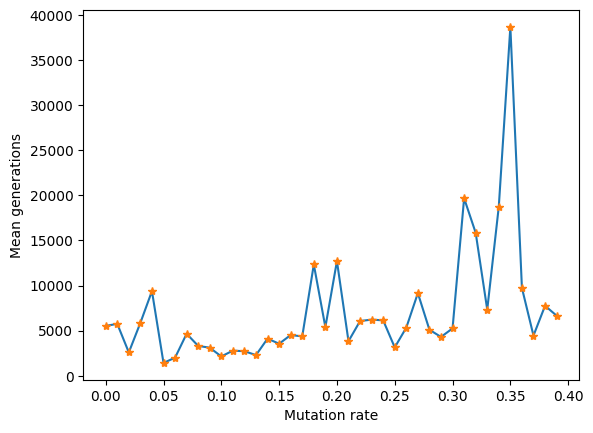

In [21]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 30
step = 0.01
u_list = list(np.arange(0, 0.4, step))

print("Generating phrases for different mutation rates: \n", u_list)
med_gens = []
t1 = time.time()
for u in u_list:
    gens = []
    t1_epoch = time.time()
    for i in range(qntd_exp):
        initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e9)
        gens.append(gen.get("gen"))
        if not gen.get("reached"):
            print(f"This experiment did not reach the phrase")
    t2_epoch = time.time()
    print(f"Mutation rate: {u:.2f} | Mean generations: {np.mean(gens):.2f} | Time taken: {t2_epoch-t1_epoch:.2f}s")

    med_gens.append(np.mean(gens))
t2 = time.time()
print("Mean generations: ", med_gens)
print("Time taken: ", t2-t1)

plt.plot(u_list, med_gens)
plt.plot(u_list, med_gens, '*')
plt.ylabel("Mean generations")
plt.xlabel("Mutation rate")
plt.show()

Generating phrases for different mutation rates: 
 [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026000000000000002, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036000000000000004, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043000000000000003, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051000000000000004, 0.052000000000000005, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059000000000000004, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.07100000000000001, 0.07200000000000001, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.08600000000000001, 0.08700000000000001, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.10200000000000001, 0.10300000000000001, 0.104000000000

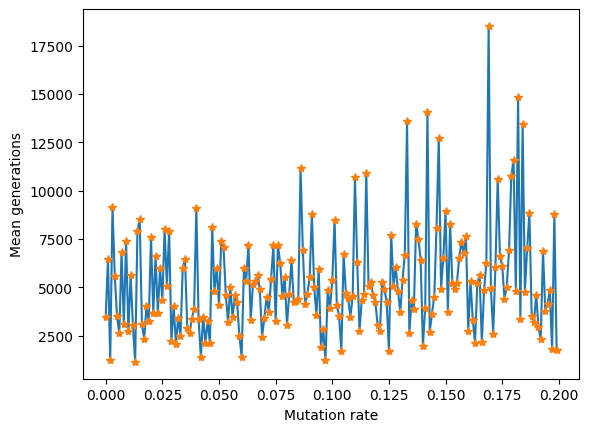

In [18]:
phrase = 'GAGCCC'#TCAATCAGGCATACC'
qntd_exp = 5
step = 0.001
u_list = list(np.arange(0, 0.2, step))

print("Generating phrases for different mutation rates: \n", u_list)
med_gens = []
t1 = time.time()
for u in u_list:
    gens = []
    t1_epoch = time.time()
    for i in range(qntd_exp):
        initial_phrase, gen = generate_phrases(phrase, u, gen_max=1e9)
        gens.append(gen.get("gen"))
        if not gen.get("reached"):
            print(f"This experiment did not reach the phrase")
    t2_epoch = time.time()
    print(f"Mutation rate: {u:.2f} | Mean generations: {np.mean(gens):.2f} | Time taken: {t2_epoch-t1_epoch:.2f}s")

    med_gens.append(np.mean(gens))
t2 = time.time()
print("Mean generations: ", med_gens)
print("Time taken: ", t2-t1)

plt.plot(u_list, med_gens)
plt.plot(u_list, med_gens, '*')
plt.ylabel("Mean generations")
plt.xlabel("Mutation rate")
plt.show()